# Diamond Market Analysis for Guldfynd

## Analysis Goal and Target Group
**Goal**: This analysis examines a large diamond dataset to help Guldfynd make smart business decisions about expanding into diamond sales. We want to understand how pricing works, and what inventory we should focus on to succeed in the Nordic market.

**Target Group**: This report is written for Guldfynd's management team, business decision-makers, and anyone involved in planning our potential diamond expansion. The analysis uses simple language and clear explanations so that both technical and non-technical team members can understand the key findings and business recommendations.

# Table of content

* Imports and configurations
* Data quality
* Calculate missing values
* Cleaning the dataset
* Consistency and Formatting
* Positives vs Negatives Summary
* General details about the dataset
* Distribution of Diamond Carat Weights
* Distribution of Diamond Cuts
* Average Diamond Price by Cut
* Distribution of Diamond Colors
* Average Diamond Price by Color
* Distribution of Diamond Clarity and price analysis
* Diamond Price vs. Carat
* Executive summaries

# imports and configurations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [3]:
dirty_df = pd.read_excel("diamonds.xlsx")

# Data quality

## Data Completeness

**Most of the data is complete**: The dataset has 53,940 records and almost all fields have information filled in. Only a very small number of values are missing (like 22 out of 53,918 carat entries, 30 out of 53,940 clarity entries, 12 out of 53,940 price entries, etc.), and each is way less than 0.1%. For example, only 1 value is missing in the cut category and 4 in color. Having so little missing data means most studies won't be very affected by these gaps.

**Positive**: Almost all of the data is there.

**Negative**: A few records are really incomplete (like row 4/ID=4 where cut, color, clarity, depth, table, and price are all missing), and missing values can mess up results if you don't deal with them properly. For example, there's a weird case where the measurements (x,y,z) are (4.20,4.23,2.63) but everything else is blank, which suggests there were problems when someone was entering the data or some measurements got lost.

# Calculate missing values

In [4]:
missing_stats = dirty_df.isnull().sum()
total_rows = len(dirty_df)
missing_report = []

# Builds a report list with only columns that have missing values
for column, missing_count in missing_stats.items():
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        missing_report.append(f"{column}: {missing_count} missing ({missing_percentage:.3f}%)")
    
print(f"Total missing values in dataset: {missing_stats.sum()}")

if missing_report:
    print("Missing value report:")
    for line in missing_report:
        print(" -", line)
else:
    print("No missing values found.")

Total missing values in dataset: 90
Missing value report:
 - carat: 22 missing (0.041%)
 - cut: 1 missing (0.002%)
 - color: 4 missing (0.007%)
 - clarity: 30 missing (0.056%)
 - depth: 6 missing (0.011%)
 - table: 5 missing (0.009%)
 - price: 12 missing (0.022%)
 - x: 3 missing (0.006%)
 - y: 4 missing (0.007%)
 - z: 3 missing (0.006%)


# Cleaning the dataset

In [5]:
def clean_diamond_data(dirty_df):
    df = dirty_df.copy()

    # 1. Drop redundant index column if present
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

    # 2. Remove exact duplicate rows
    df.drop_duplicates(inplace=True)

    # 3. Remove rows with missing values in any column
    df.dropna(inplace=True)

    # 4. Remove rows with invalid (zero or negative) physical dimensions
    dimension_columns = ['x', 'y', 'z']
    df = df[(df[dimension_columns] > 0).all(axis=1)]

    return df

# Example usage

print("Dirty dataset shape:", dirty_df.shape)
df = clean_diamond_data(dirty_df)
print("Cleaned dataset shape:", df.shape)

Dirty dataset shape: (53940, 11)
Cleaned dataset shape: (53699, 10)


# Consistency and Formatting

## GIA Cut Grades:

The dataset uses the following cut grades: Ideal, Premium, Very Good, Good, Fair.

These do not match exactly with GIA's (Gemological Institute of America) official cut grade scale, which is: Excellent, Very Good, Good, Fair, Poor.

The fact that we see "Premium" and "Ideal" suggests the grading system might come from a different source, such as AGS (American Gem Society), which uses "Ideal".

# Positives vs Negatives Summary

**Positives**: The data mostly follows the expected format and rating rules. The columns have the right kind of data. The dataset covers a normal range of diamonds (carats, colors, clarities) for studying, and includes many entries in typical average quality.

**Negatives**: There are some problems and mistakes: missing and zero values in important columns and some unusual rating terms, duplicates, and really extreme values. For example, missing or zero measurements and extremely low depth percentages show there are data problems, and duplicate rows make the numbers look bigger than they should be. These issues break the rules for good data quality and we have already fixed them in the cells above.

# General details about the dataset

In [6]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())

Dataset shape: (53699, 10)

Data types:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

Summary statistics:
              carat         depth         table         price             x  \
count  53699.000000  53699.000000  53699.000000  53699.000000  53699.000000   
mean       0.797709     61.748496     57.458029   3933.222742      5.731847   
std        0.473387      1.429458      2.233335   3988.063619      1.119027   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5330.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                 y     

---
---

# Distribution of Diamond Carat Weights

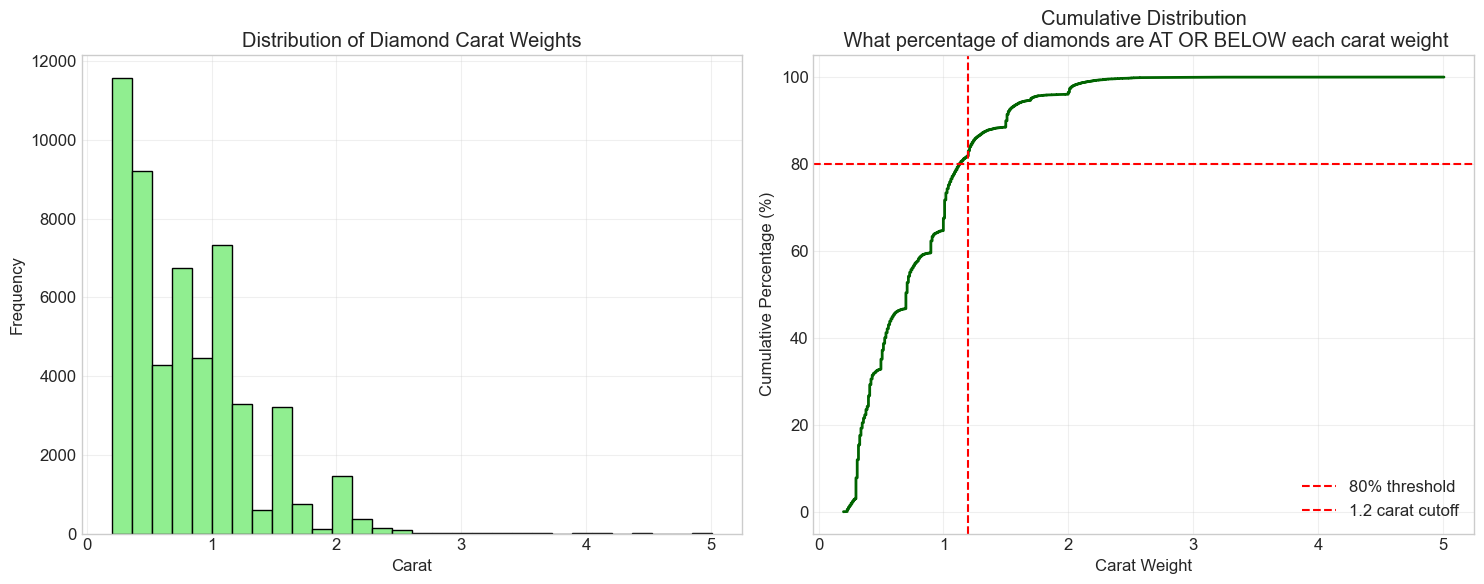

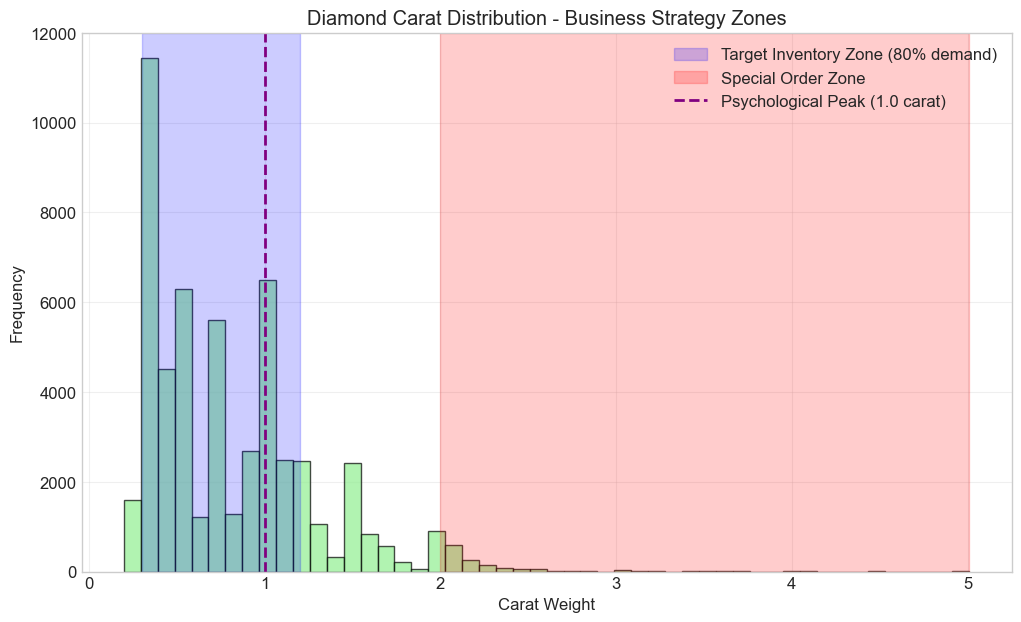

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# histogram
ax1.hist(df['carat'], bins=30, color='lightgreen', edgecolor='black')
ax1.set_title('Distribution of Diamond Carat Weights')
ax1.set_xlabel('Carat')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Cumulative percentage
sorted_carats = np.sort(df['carat'])
cumulative_pct = np.arange(1, len(sorted_carats) + 1) / len(sorted_carats) * 100
ax2.plot(sorted_carats, cumulative_pct, color='darkgreen', linewidth=2)
ax2.axhline(y=80, color='red', linestyle='--', label='80% threshold')
ax2.axvline(x=1.2, color='red', linestyle='--', label='1.2 carat cutoff')
ax2.set_title('Cumulative Distribution\n What percentage of diamonds are AT OR BELOW each carat weight')
ax2.set_xlabel('Carat Weight')
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.tight_layout()


plt.figure(figsize=(12, 7))
plt.hist(df['carat'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)

# Add business zone annotations
plt.axvspan(0.3, 1.2, alpha=0.2, color='blue', label='Target Inventory Zone (80% demand)')
plt.axvspan(2.0, df['carat'].max(), alpha=0.2, color='red', label='Special Order Zone')
plt.axvline(x=1.0, color='purple', linestyle='--', linewidth=2, label='Psychological Peak (1.0 carat)')

plt.title('Diamond Carat Distribution - Business Strategy Zones')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

From this plot we see that diamond carat weights are spread out with most diamonds bunched up between 0.3-1.0 carats. The biggest group is at 0.3-0.4 carats with over 11,000 diamonds, followed by a big jump at 1.0 carat. The numbers drop off sharply after 2 carats.

This has the following implications: The market likes smaller, cheaper diamonds, showing that customers want luxury they can actually afford. The big spike at 1.0 carat shows how important this size is for engagement rings and other special purchases. Bigger diamonds represent a small, expensive market section.

From business settings we can see that Guldfynd should focus their starting inventory on 0.3-1.2 carat range to catch about 80% of what customers want, keeping costs low while selling the most diamonds. Larger diamonds (2+ carats) should be ordered only when customers ask for them to avoid losing money on expensive inventory in the Nordic market.

# Distribution of Diamond Cuts

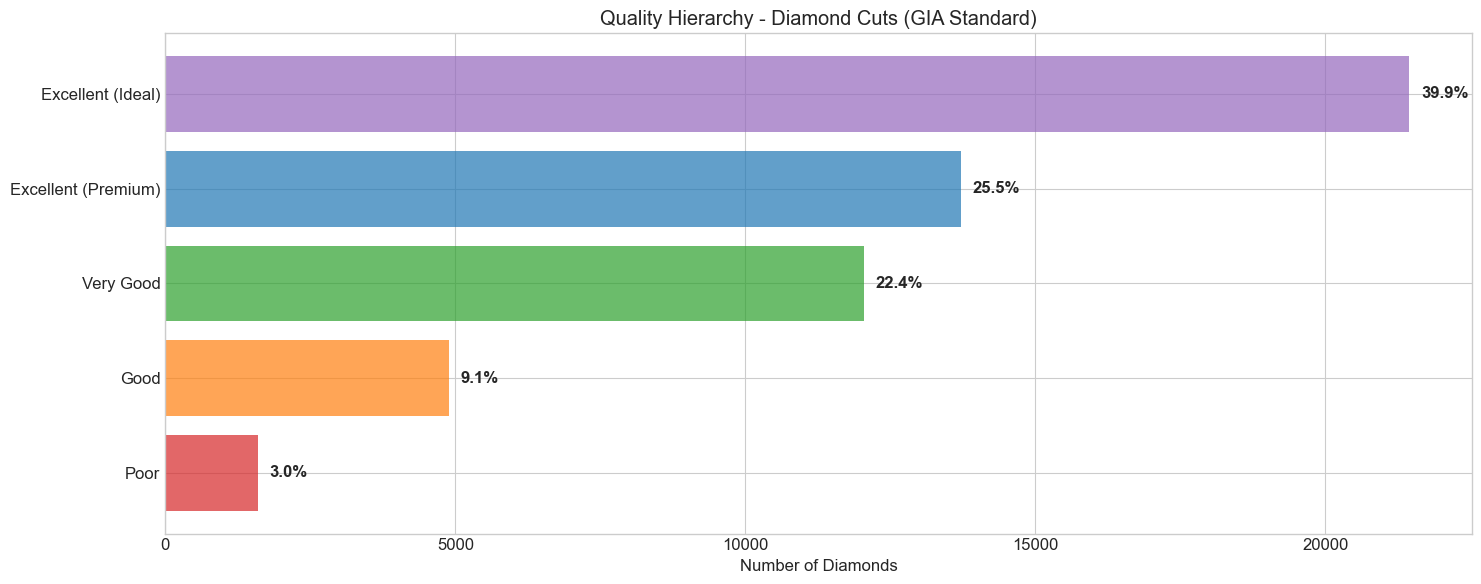

Type of cut:    Ideal | Shallow | Deep | Very Shallow | Very Deep
GIA cut grade:  Excellent | Very Good | Good | Fair | Poor


In [8]:
# Create mapping from current names to GIA standard ratings
cut_mapping_detailed = {
    'Fair': 'Poor',
    'Good': 'Good', 
    'Very Good': 'Very Good',
    'Premium': 'Excellent (Premium)',
    'Ideal': 'Excellent (Ideal)'
}

# Apply the mapping to create the new column
df['cut_gia'] = df['cut'].map(cut_mapping_detailed)

# Get value counts from the NEW mapped column
cut_counts_gia = df['cut_gia'].value_counts()
total = cut_counts_gia.sum()

fig, ax2 = plt.subplots(1, figsize=(15, 6))

# Order by GIA standard hierarchy - use the ACTUAL mapped values
cuts_ordered_gia = ['Poor', 'Good', 'Very Good', 'Excellent (Premium)', 'Excellent (Ideal)']
counts_ordered = [cut_counts_gia.get(cut, 0) for cut in cuts_ordered_gia]
percentages = [count/total*100 for count in counts_ordered]

colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd']
y_pos = range(len(cuts_ordered_gia))

bars = ax2.barh(y_pos, counts_ordered, color=colors, alpha=0.7)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(cuts_ordered_gia)
ax2.set_xlabel('Number of Diamonds')
ax2.set_title('Quality Hierarchy - Diamond Cuts (GIA Standard)')

# Add percentage labels
for i, (bar, pct) in enumerate(zip(bars, percentages)):
    width = bar.get_width()
    ax2.text(width + 200, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

cut_types = ["Ideal", "Shallow", "Deep", "Very Shallow", "Very Deep"]
gia_grades = ["Excellent", "Very Good", "Good", "Fair", "Poor"]

print("Type of cut:   ", " | ".join(cut_types))
print("GIA cut grade: ", " | ".join(gia_grades))

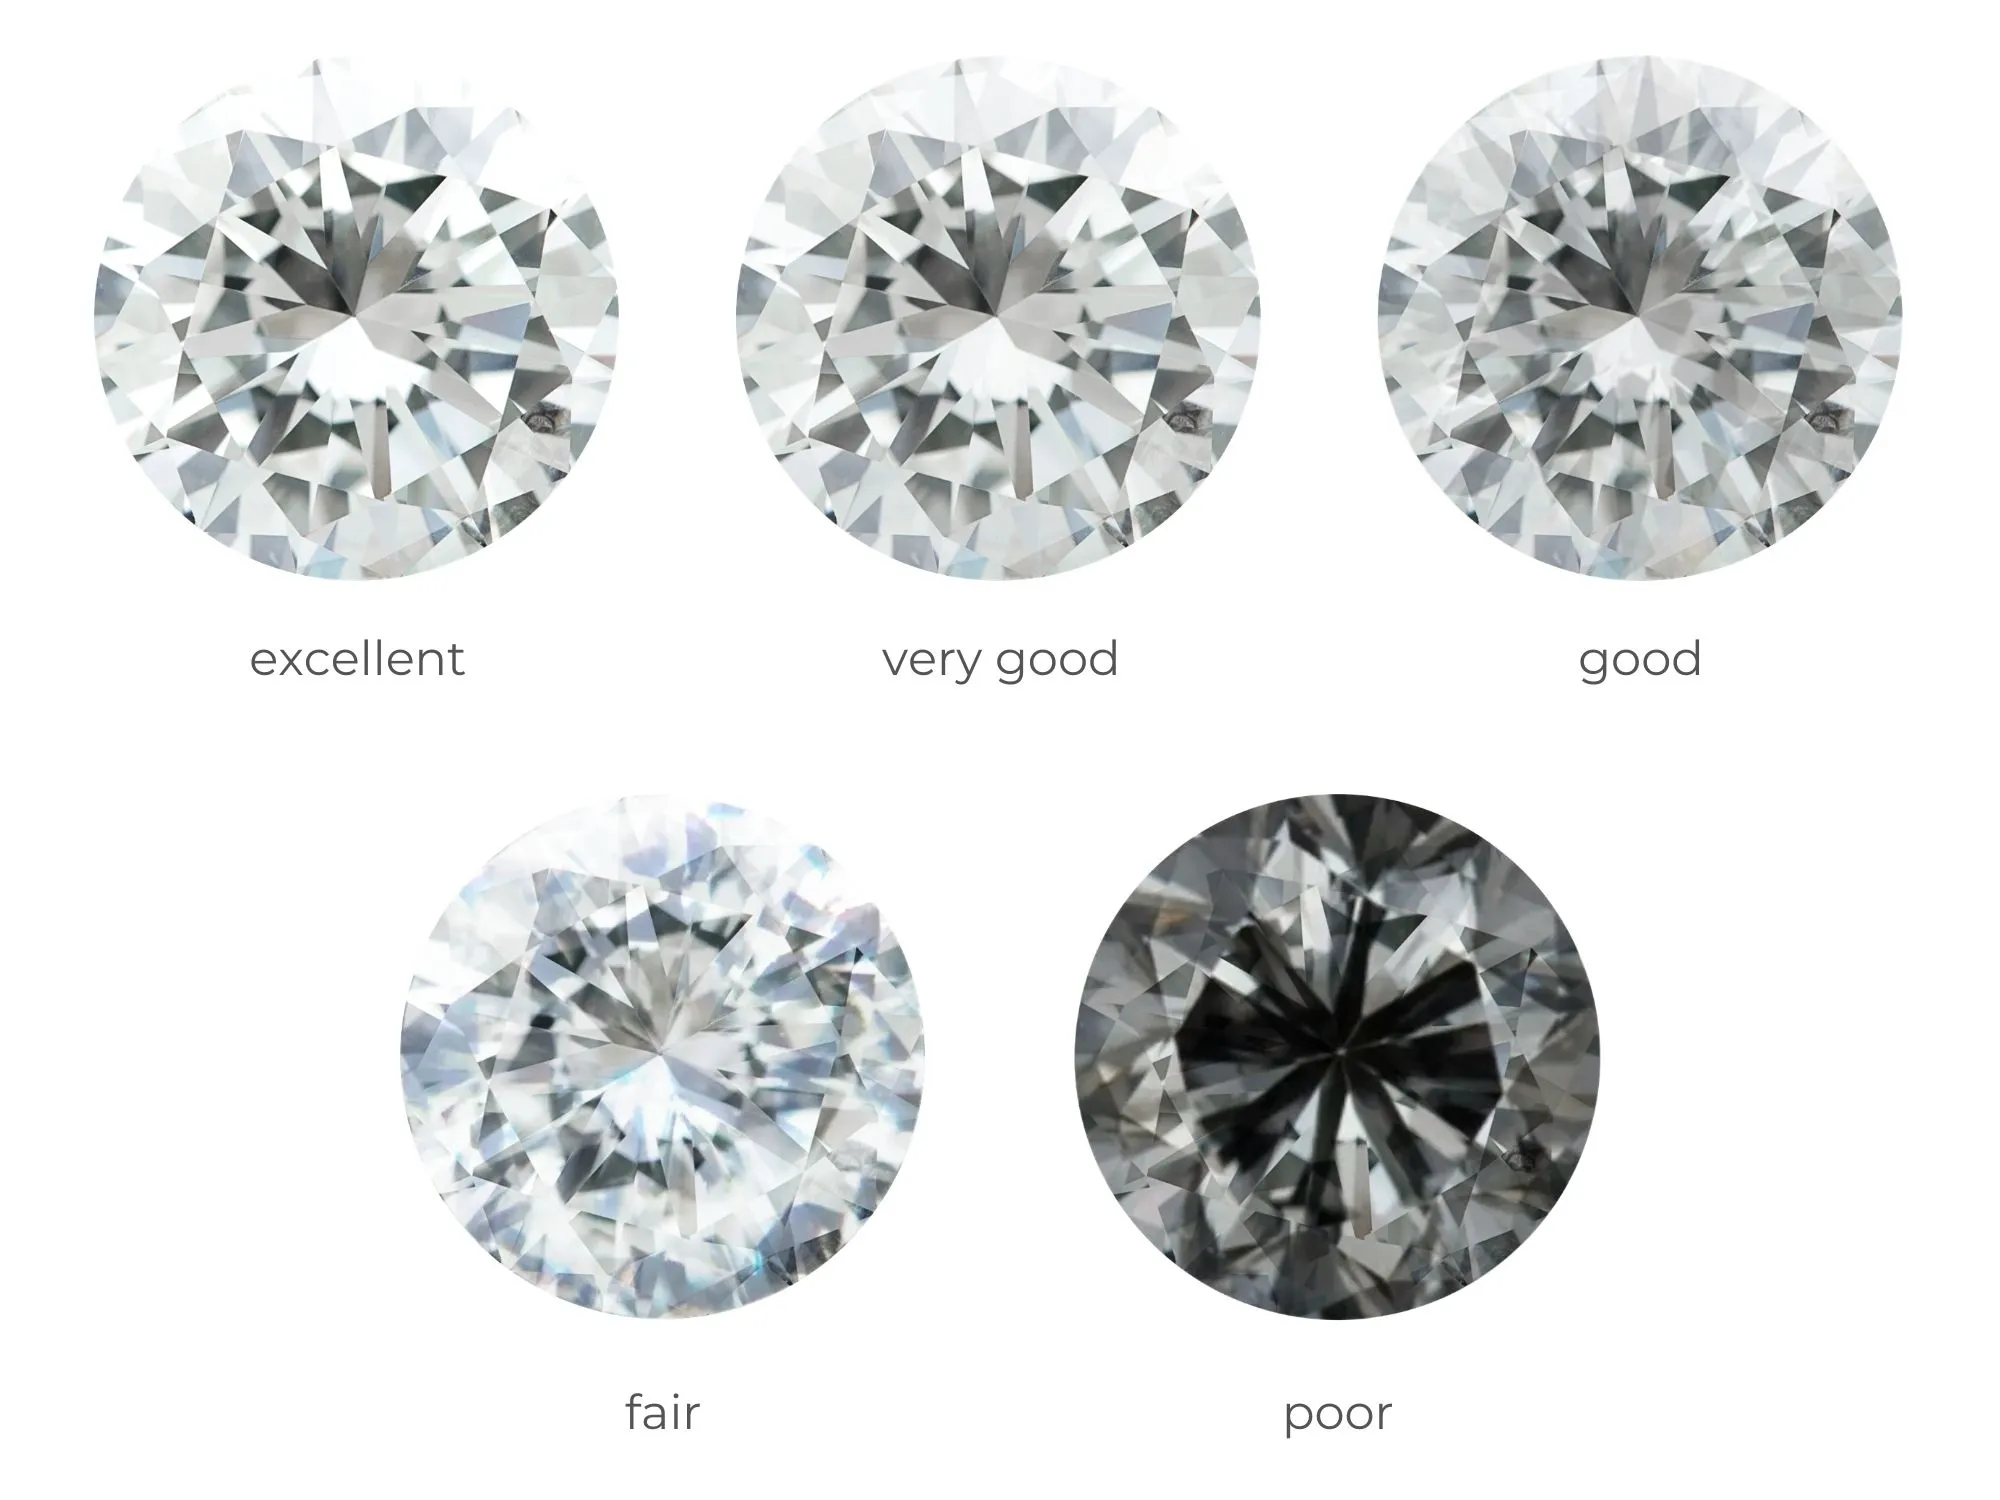

From this plot we see that diamond cut quality shows a clear order with "Ideal" cuts taking over the market at over 22,000 diamonds, followed by "Premium" at about 14,000, and "Very Good" at 12,000. The numbers drop off a lot for "Good" (5,000) and "Fair" (2,000) cuts, creating a big drop from high-quality to lower quality cuts.

This has the following implications: The market really likes better cut quality, with almost 70% of diamonds falling into the top three groups (Ideal, Premium, Very Good). Customers are willing to pay more for better light and sparkle that comes with better cuts. The small number of "Fair" cuts suggests there isn't much demand for them.

From business settings we can see that Guldfynd should focus on getting "Ideal" and "Premium" cuts to meet what customers expect in the quality-focused Nordic market. The data shows customers care about cut quality, so buying better cuts will likely make more money and keep customers happy. "Fair" and "Good" cuts should be kept to a minimum to avoid having diamonds that don't sell well.

# Average Diamond Price by Cut

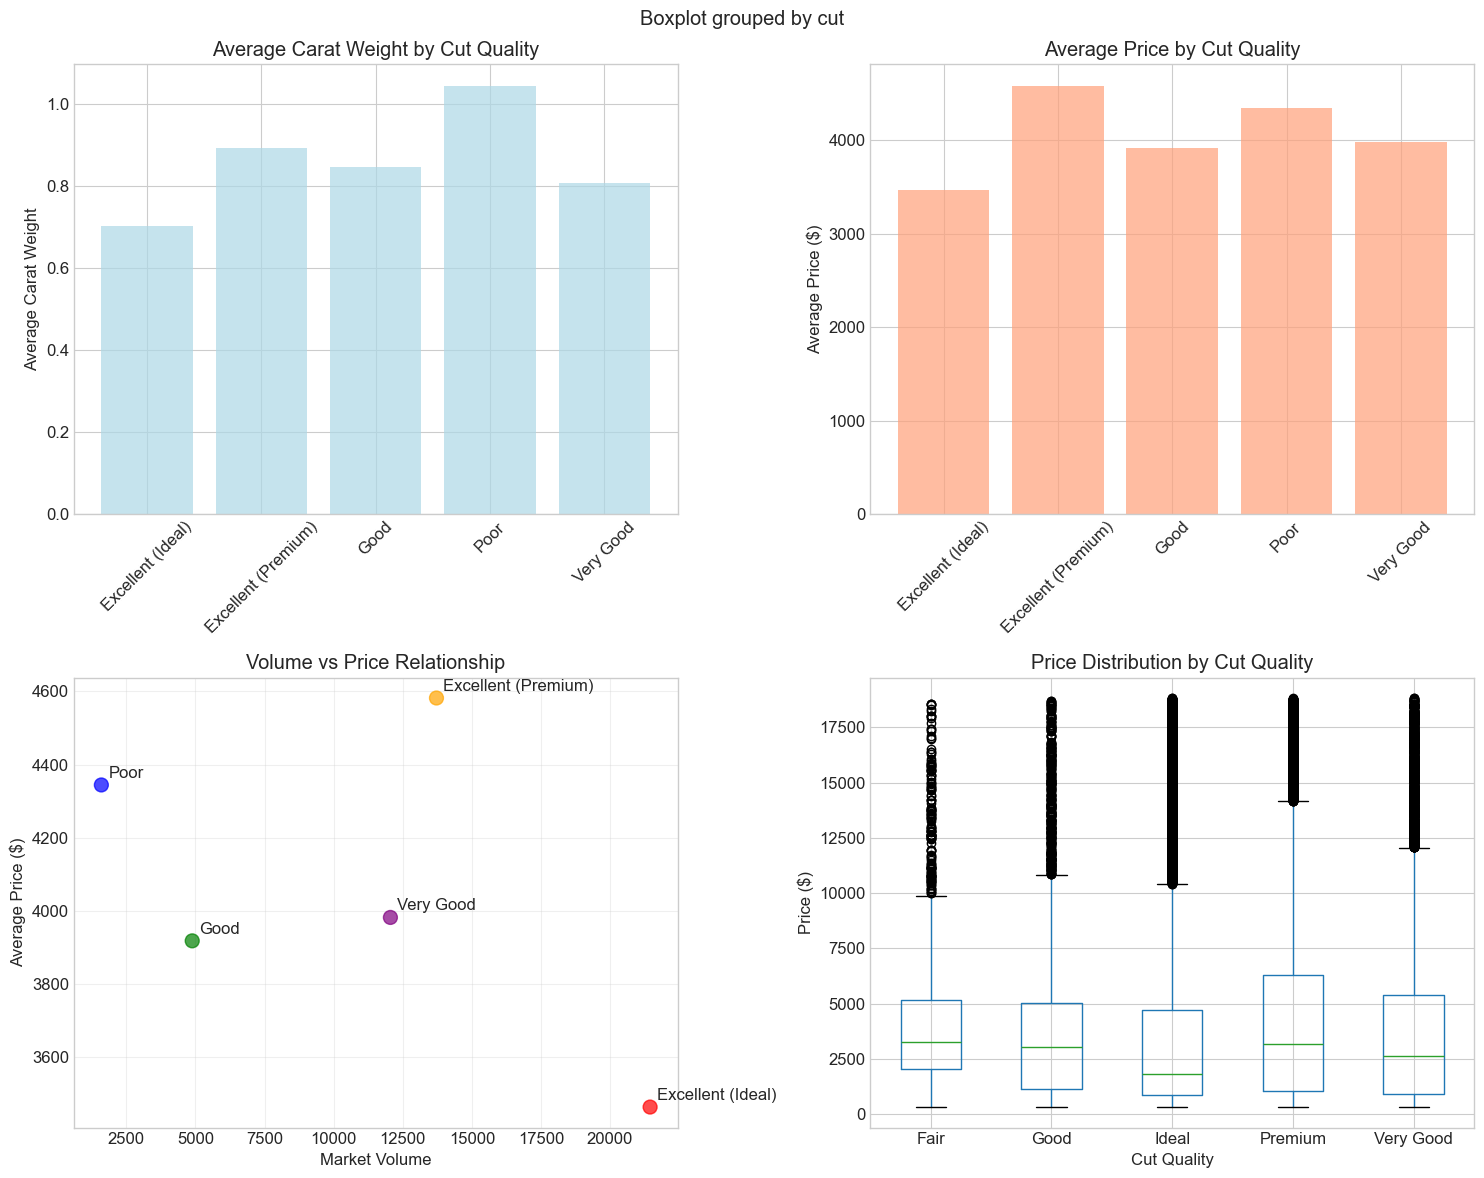

Type of cut:    Ideal | Shallow | Deep | Very Shallow | Very Deep
GIA cut grade:  Excellent | Very Good | Good | Fair | Poor


In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Cut vs Carat relationship
avg_carat_by_cut = df.groupby('cut_gia')['carat'].mean().sort_index()
ax1.bar(avg_carat_by_cut.index, avg_carat_by_cut.values, color='lightblue', alpha=0.7)
ax1.set_title('Average Carat Weight by Cut Quality')
ax1.set_ylabel('Average Carat Weight')
ax1.tick_params(axis='x', rotation=45)

# Cut vs Price (your existing plot)
avg_price_by_cut = df.groupby('cut_gia')['price'].mean().sort_index()
ax2.bar(avg_price_by_cut.index, avg_price_by_cut.values, color='lightsalmon', alpha=0.7)
ax2.set_title('Average Price by Cut Quality')
ax2.set_ylabel('Average Price ($)')
ax2.tick_params(axis='x', rotation=45)

# Volume vs Price scatter
cut_counts = df['cut_gia'].value_counts()
avg_prices = df.groupby('cut_gia')['price'].mean()
ax3.scatter([cut_counts[cut] for cut in avg_prices.index], 
           avg_prices.values, s=100, alpha=0.7, color=['red', 'orange', 'green', 'blue', 'purple'])
for i, cut in enumerate(avg_prices.index):
    ax3.annotate(cut, (cut_counts[cut], avg_prices[cut]), 
                xytext=(5, 5), textcoords='offset points')
ax3.set_xlabel('Market Volume')
ax3.set_ylabel('Average Price ($)')
ax3.set_title('Volume vs Price Relationship')
ax3.grid(True, alpha=0.3)

# Price distribution by cut (boxplot)
df.boxplot(column='price', by='cut', ax=ax4)
ax4.set_title('Price Distribution by Cut Quality')
ax4.set_xlabel('Cut Quality')
ax4.set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

print("Type of cut:   ", " | ".join(cut_types))
print("GIA cut grade: ", " | ".join(gia_grades))

From this plot we see a surprising pricing pattern where "Premium" cuts have the highest average price at \\$4,600, followed by "Fair" cuts around \\$4,400. Surprisingly, "Ideal" cuts show the lowest average price at \\$3,500, while "Very Good" and "Good" cuts fall in the middle range around \\$4,000 and \\$3,900.

This has the following implications: **Cut quality by itself doesn't decide the price**. other things like carat weight, color, and clarity probably have bigger effects on pricing. The high price of "Fair" cuts suggests they might make up for their poor cut by being bigger or having better color/clarity grades. The lower price of "Ideal" cuts shows they may be made in large amounts the same way, creating lower prices to compete.

From business settings we can see that Guldfynd should not think that better cut grades automatically mean higher prices. We need to think about all four quality factors (cut, carat, color, clarity) when setting prices for inventory. This pricing pattern shows chances to offer high-quality "Ideal" cuts at good prices while still making good profit in the Nordic market.

# Distribution of Diamond Colors

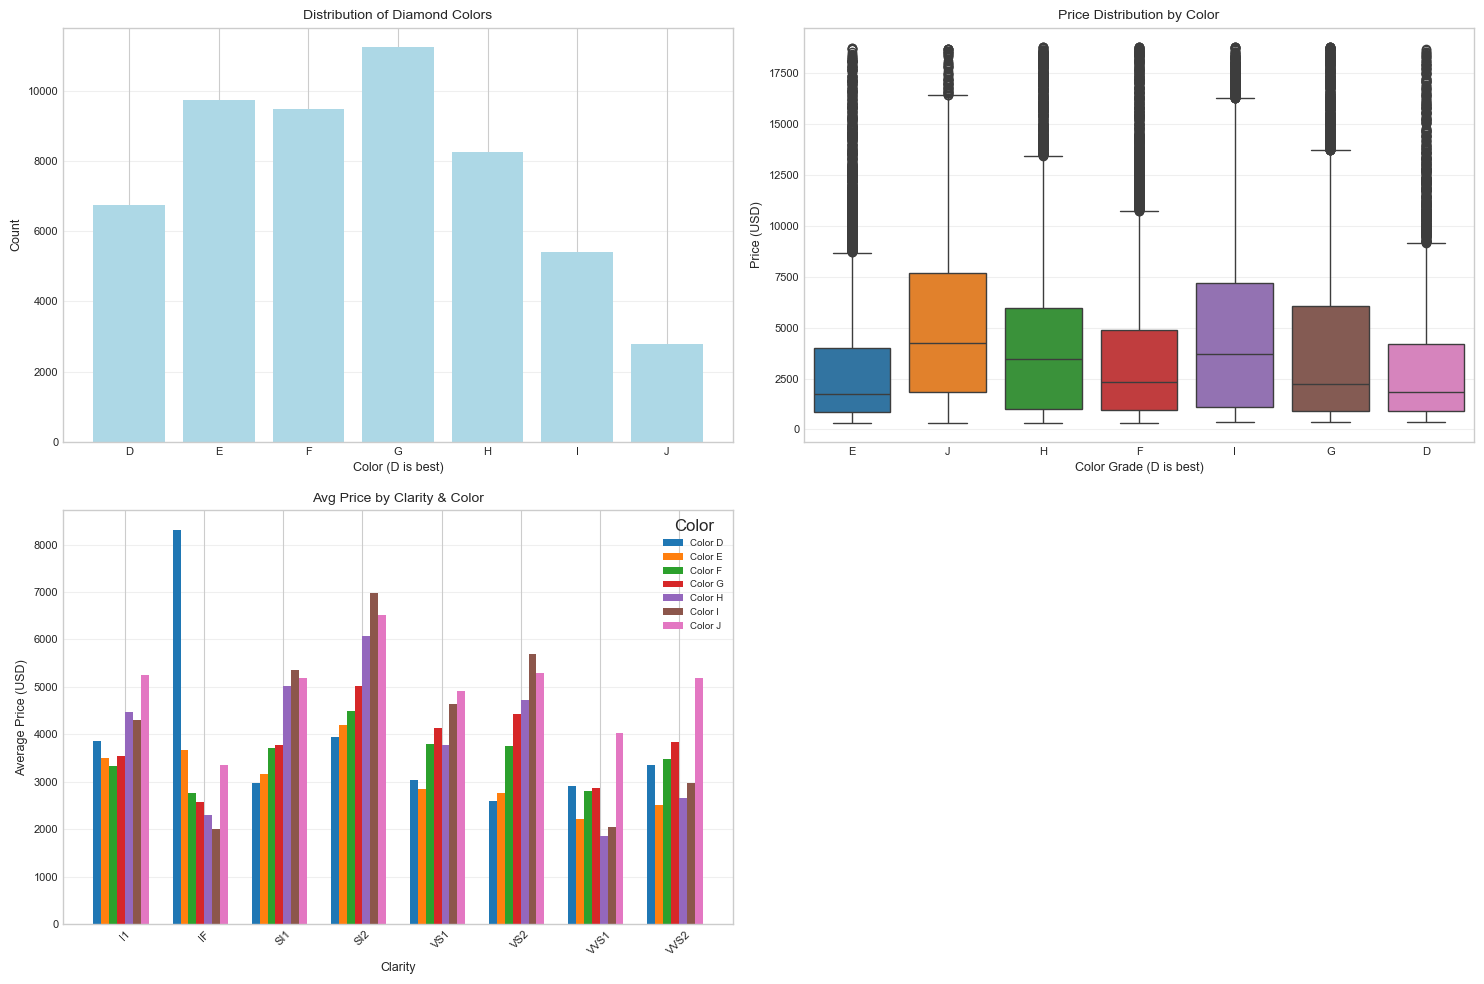

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax1, ax2 = axes[0, 0], axes[0, 1]
ax3 = axes[1, 0] 
axes[1, 1].axis('off')

# Plot 1: Color distribution
color_counts = df['color'].value_counts().sort_index()
ax1.bar(color_counts.index, color_counts.values, color='lightblue')
ax1.set_title('Distribution of Diamond Colors', fontsize=10)
ax1.set_xlabel('Color (D is best)', fontsize=9)
ax1.set_ylabel('Count', fontsize=9)
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='both', which='major', labelsize=8)

# Plot 2: Price distribution by color (boxplot)
sns.boxplot(data=df, x='color', y='price', hue='color', ax=ax2, legend=False)
ax2.set_title('Price Distribution by Color', fontsize=10)
ax2.set_xlabel('Color Grade (D is best)', fontsize=9)
ax2.set_ylabel('Price (USD)', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='both', which='major', labelsize=8)

# Plot 3: Average price by clarity and color
df['color'] = df['color'].astype(str)
df['clarity'] = df['clarity'].astype(str)
colors = sorted(df['color'].unique())
clarities = sorted(df['clarity'].unique())
grouped = df.groupby(['color', 'clarity'])['price'].mean().unstack()
x = np.arange(len(clarities))
bar_width = 0.1

for i, color in enumerate(colors):
    prices = grouped.loc[color]
    ax3.bar(x + i * bar_width, prices.values, width=bar_width, label=f'Color {color}')

ax3.set_xlabel("Clarity", fontsize=9)
ax3.set_ylabel("Average Price (USD)", fontsize=9)
ax3.set_title("Avg Price by Clarity & Color", fontsize=10)
ax3.set_xticks(x + bar_width * (len(colors) / 2))
ax3.set_xticklabels(clarities, rotation=45, fontsize=8)
ax3.legend(title="Color", fontsize=7)
ax3.grid(axis='y', alpha=0.3)
ax3.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

From this plot we see that diamond color spread follows a curved shape with G color (near-colorless) showing the biggest number at about 11,300 diamonds. The middle-range colors E and F also show a lot with around 9,800 and 9,500 diamonds each. The highest quality D color appears less often at 6,700 diamonds, while the lower quality colors I and J show smaller numbers at 5,500 and 2,800 diamonds.

This has the following implications: The market focuses mostly in the near-colorless range (E, F, G, H), making up about 75% of available diamonds. Truly colorless D diamonds are expensive and harder to find, while lower grades (I, J) have limited market presence.

From business settings we can see that Guldfynd should focus inventory on E, F, G, and H color grades to capture most of what the market wants. D color diamonds should be positioned as expensive premium offerings, while I and J grades may work well for customers watching their budget. This spread supports different price levels across different color grades for the Nordic market.

# Average Diamond Price by Color

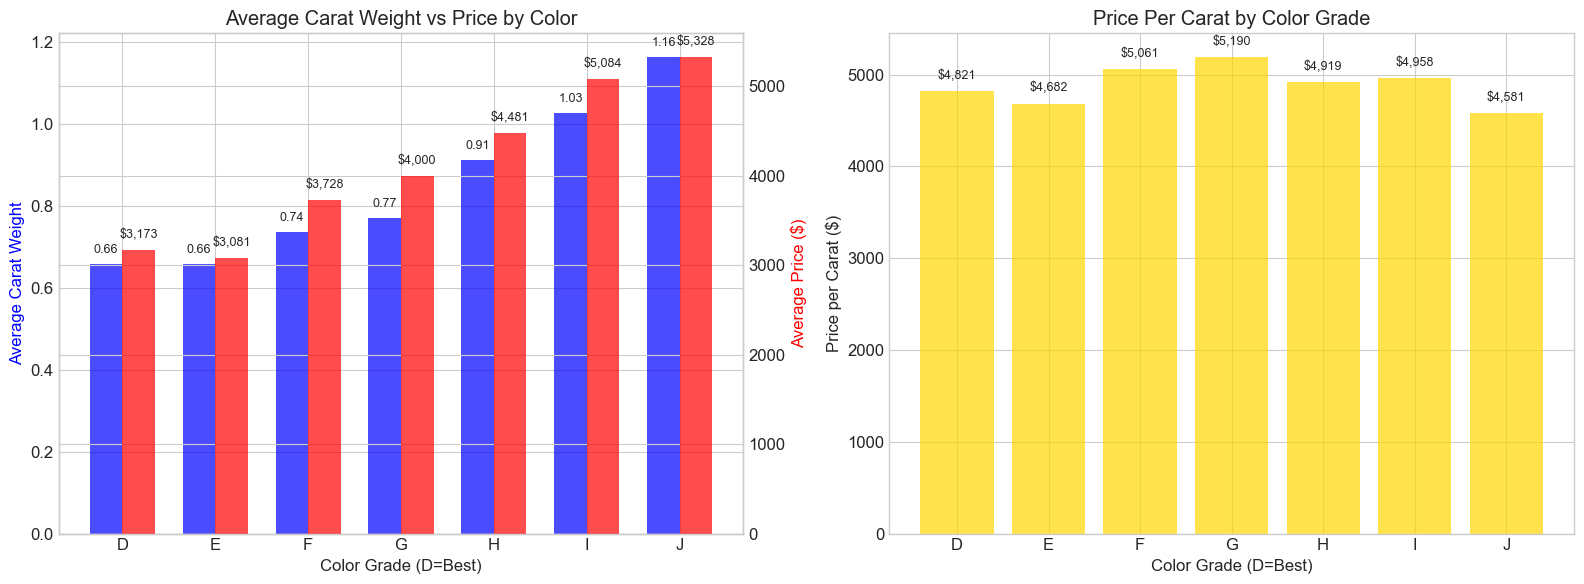

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Carat vs Price by Color
color_analysis = df.groupby('color').agg({
    'carat': 'mean',
    'price': 'mean'
}).sort_index()

x = np.arange(len(color_analysis.index))
width = 0.35

# Primary axis - Carat weight
bars1 = ax1.bar(x - width/2, color_analysis['carat'], width, 
                label='Avg Carat', color='blue', alpha=0.7)

# Secondary axis - Price
ax1_twin = ax1.twinx()
bars2 = ax1_twin.bar(x + width/2, color_analysis['price'], width, 
                     label='Avg Price', color='red', alpha=0.7)

ax1.set_xlabel('Color Grade (D=Best)')
ax1.set_ylabel('Average Carat Weight', color='blue')
ax1_twin.set_ylabel('Average Price ($)', color='red')
ax1.set_title('Average Carat Weight vs Price by Color')
ax1.set_xticks(x)
ax1.set_xticklabels(color_analysis.index)

# Simple value labels
for i, (bar, val) in enumerate(zip(bars1, color_analysis['carat'])):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{val:.2f}', ha='center', va='bottom', fontsize=9)

for i, (bar, val) in enumerate(zip(bars2, color_analysis['price'])):
    ax1_twin.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                  f'${val:,.0f}', ha='center', va='bottom', fontsize=9)

# Right: Price per carat
color_analysis['price_per_carat'] = color_analysis['price'] / color_analysis['carat']
bars3 = ax2.bar(color_analysis.index, color_analysis['price_per_carat'], 
                color='gold', alpha=0.7)

ax2.set_title('Price Per Carat by Color Grade')
ax2.set_xlabel('Color Grade (D=Best)')
ax2.set_ylabel('Price per Carat ($)')

# Simple value labels
for bar, val in zip(bars3, color_analysis['price_per_carat']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'${val:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

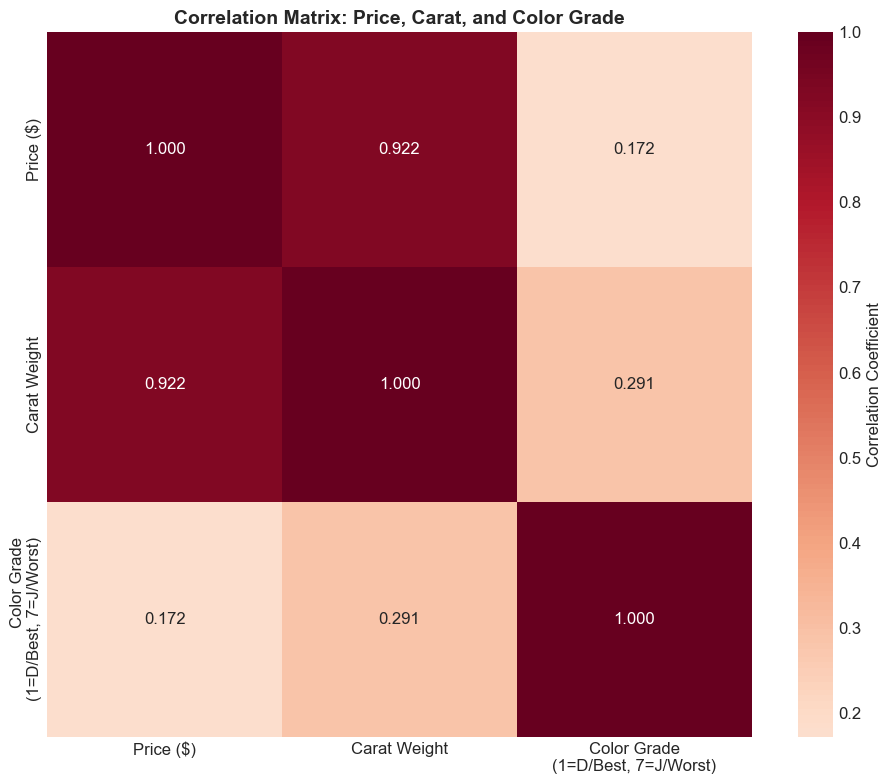

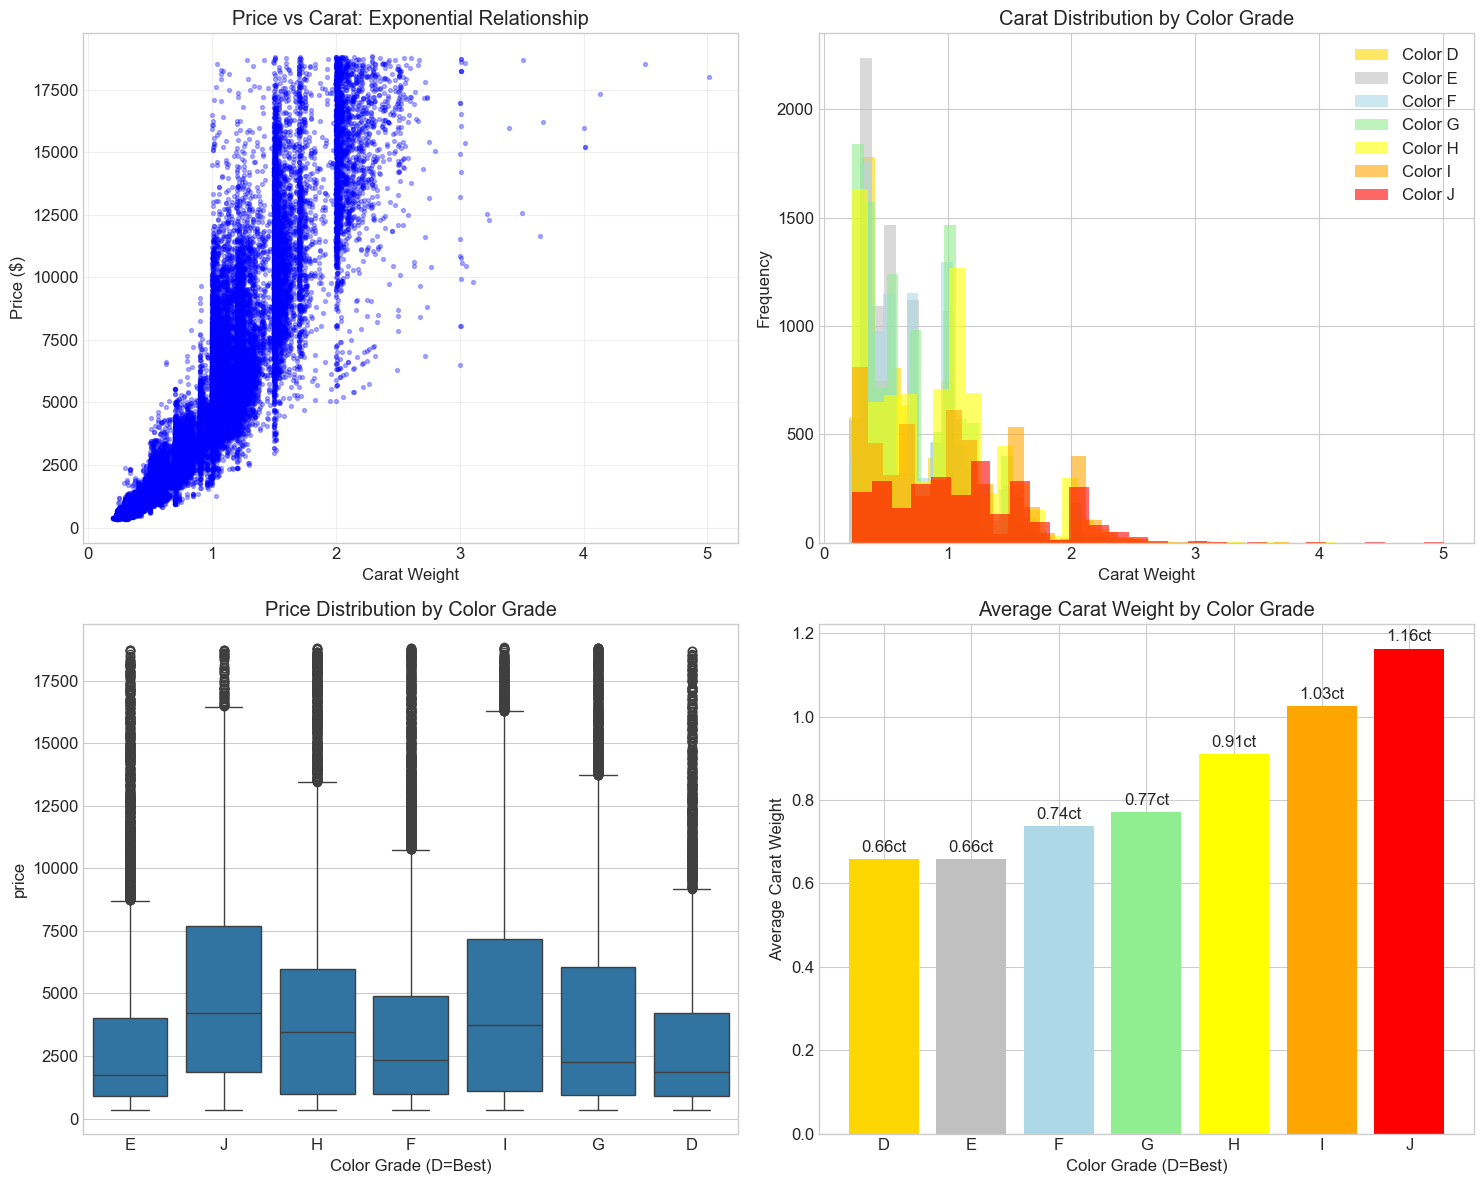

In [12]:
# Convert color grades to numeric values (lower = better quality)
color_numeric_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
df['color_numeric'] = df['color'].map(color_numeric_mapping)

# Create correlation matrix
correlation_data = df[['price', 'carat', 'color_numeric']].corr()

# Create the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, 
            annot=True,           # Show correlation values
            cmap='RdBu_r',        # Red-Blue colormap (red=positive, blue=negative)
            center=0,             # Center colormap at 0
            square=True,          # Square cells
            fmt='.3f',            # 3 decimal places
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix: Price, Carat, and Color Grade', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')

# Rename labels for clarity
plt.gca().set_xticklabels(['Price ($)', 'Carat Weight', 'Color Grade\n(1=D/Best, 7=J/Worst)'])
plt.gca().set_yticklabels(['Price ($)', 'Carat Weight', 'Color Grade\n(1=D/Best, 7=J/Worst)'])

plt.tight_layout()
plt.show()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. The key relationship: Price vs Carat
ax1.scatter(df['carat'], df['price'], alpha=0.3, s=8, color='blue')
ax1.set_xlabel('Carat Weight')
ax1.set_ylabel('Price ($)')
ax1.set_title('Price vs Carat: Exponential Relationship')
ax1.grid(True, alpha=0.3)

# 2. Size distribution by color
colors = ['gold', 'silver', 'lightblue', 'lightgreen', 'yellow', 'orange', 'red']
for i, color_grade in enumerate(sorted(df['color'].unique())):
    color_data = df[df['color'] == color_grade]['carat']
    ax2.hist(color_data, bins=30, alpha=0.6, label=f'Color {color_grade}', 
             color=colors[i % len(colors)])
ax2.set_xlabel('Carat Weight')
ax2.set_ylabel('Frequency')
ax2.set_title('Carat Distribution by Color Grade')
ax2.legend()

# 3. Price distribution by color
sns.boxplot(data=df, x='color', y='price', ax=ax3)
ax3.set_title('Price Distribution by Color Grade')
ax3.set_xlabel('Color Grade (D=Best)')

# 4. Average size by color
avg_carat_by_color = df.groupby('color')['carat'].mean().sort_index()
bars = ax4.bar(avg_carat_by_color.index, avg_carat_by_color.values, 
               color=colors[:len(avg_carat_by_color)])
ax4.set_title('Average Carat Weight by Color Grade')
ax4.set_xlabel('Color Grade (D=Best)')
ax4.set_ylabel('Average Carat Weight')

# Add value labels
for bar, val in zip(bars, avg_carat_by_color.values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.2f}ct', ha='center', va='bottom')

plt.tight_layout()
plt.show()

From these plots we see an unexpected pricing pattern where lower color grades have higher average prices. J color (lowest quality) shows the highest average price at \\$5,300, followed by I color at \\$5,100. Meanwhile, the expensive D and E colors show the lowest average prices at \\$3,200 and \\$3,100, with prices going up steadily from F (\\$3,700) through H (\\$4,500) as color quality gets worse.

From the correlation matrix we also see that carat weight has an extremely strong connection with price (0.922), while color grade shows only a weak connection (0.172). The almost perfect relationship between carat and price shows **that size matters** when it comes to pricing, while color quality has very little direct effect on pricing.

This has the following implications: Color grade by itself does not control pricing! Diamonds with lower color grades probably make up for it with bigger carat weights or better clarity to explain their higher prices. The expensive D and E colors may be more available in smaller sizes, keeping average prices lower. This suggests customers care more about size and sparkle than perfect color in many buying decisions.

From business settings we can see that Guldfynd should not think that higher color grades automatically mean higher prices. The data suggests chances to offer expensive D and E color diamonds at good price points while still making profit. For larger diamonds where color is more obvious, the company should stress the value of better color grades to explain pricing in the Nordic market.

# Distribution of Diamond Clarity and price analysis

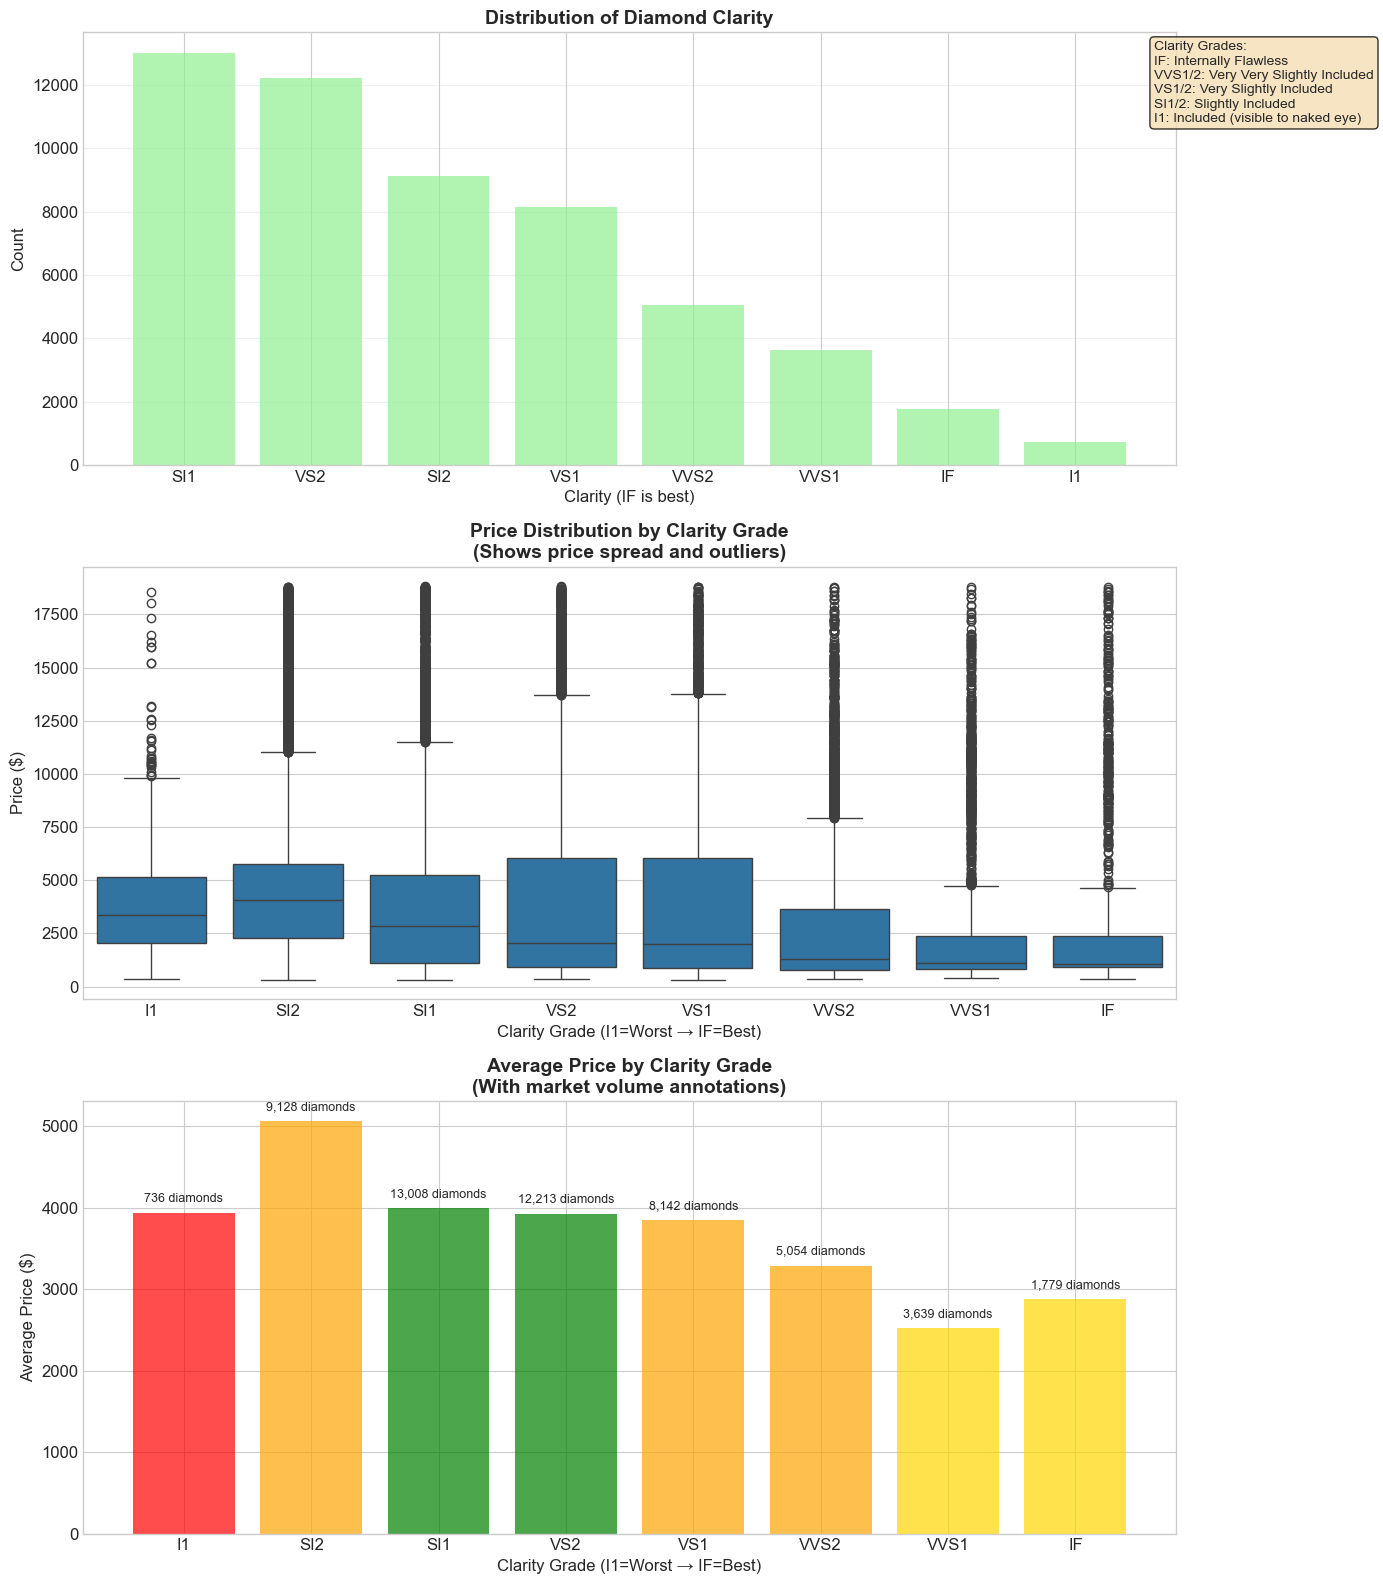

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 16))

# Top: Distribution of Diamond Clarity
clarity_counts = df['clarity'].value_counts()
bars1 = ax1.bar(clarity_counts.index, clarity_counts.values, color='lightgreen', alpha=0.7)
ax1.set_title('Distribution of Diamond Clarity', fontsize=14, fontweight='bold')
ax1.set_xlabel('Clarity (IF is best)')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3, axis='y')

# Descriptions as text box in top right
clarity_text = """Clarity Grades:
IF: Internally Flawless
VVS1/2: Very Very Slightly Included
VS1/2: Very Slightly Included  
SI1/2: Slightly Included
I1: Included (visible to naked eye)"""
ax1.text(0.98, 0.98, clarity_text, transform=ax1.transAxes, 
         fontsize=10, 
         verticalalignment='top', 
         horizontalalignment='right',
         ha='left',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Middle: Box plot showing price ranges
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.boxplot(data=df, x='clarity', y='price', order=clarity_order, ax=ax2)
ax2.set_title('Price Distribution by Clarity Grade\n(Shows price spread and outliers)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Clarity Grade (I1=Worst → IF=Best)')
ax2.set_ylabel('Price ($)')

# Bottom: Average price vs volume with annotations
clarity_stats = df.groupby('clarity').agg({
    'price': 'mean',
    'clarity': 'count'
}).rename(columns={'clarity': 'count'}).reindex(clarity_order)

bars2 = ax3.bar(clarity_stats.index, clarity_stats['price'], 
                color=['red', 'orange', 'green', 'green', 'orange', 'orange', 'gold', 'gold'],
                alpha=0.7)

# Add volume labels on bars
for bar, count in zip(bars2, clarity_stats['count']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'{count:,} diamonds', ha='center', va='bottom', fontsize=9)

ax3.set_title('Average Price by Clarity Grade\n(With market volume annotations)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Clarity Grade (I1=Worst → IF=Best)')
ax3.set_ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

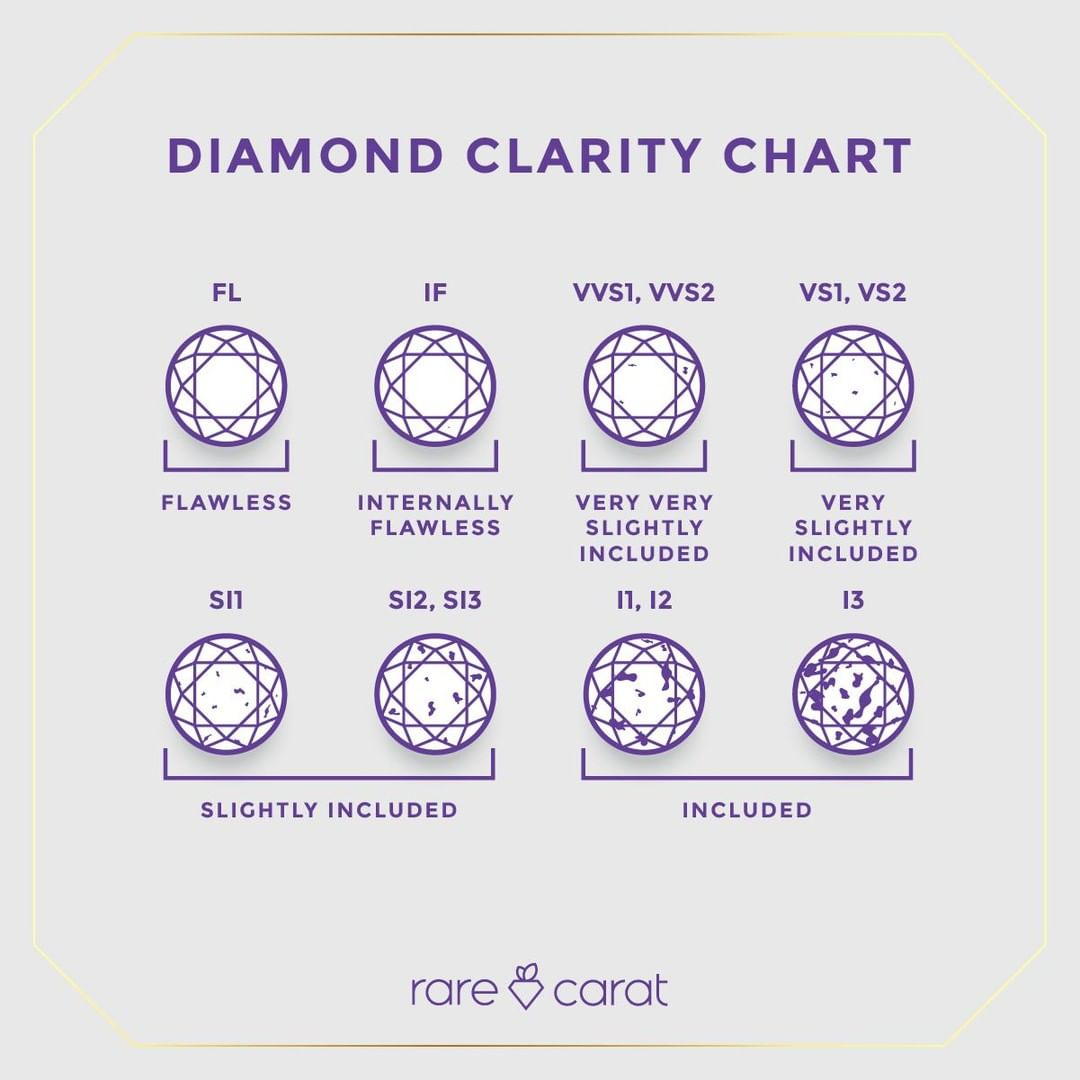

From this plot we see that diamond clarity spread mostly focuses on mid-range grades, with SI1 showing the biggest number at about 13,000 diamonds, followed by VS2 at around 12,000. However, the pricing pattern is surprising. SI2 clarity (lower grade) has the highest average price at \\$5,000, while VVS1 (very high clarity) shows the lowest average price at \\$2,500. Expensive clarity grades IF and VVS1 show very low numbers under 2,000 diamonds each, yet don't get matching higher prices.

This has the following implications: The market focuses on clarity grades that offer good value (SI1 and VS2), representing the sweet spot where flaws are small but prices stay affordable. Clarity grade by itself does not decide pricing - diamonds with lower clarity grades probably make up for it with bigger carat weights, better color, or better cuts. The lower prices for expensive VVS1 and IF grades suggest these are available mostly in smaller sizes. Most customers care more about diamonds that look clean to the eye and overall visual impact than technical clarity perfection under a microscope.

From business settings we can see that Guldfynd should focus inventory on SI1 and VS2 clarity grades to capture most of what the market wants while not thinking that higher clarity grades automatically deserve expensive pricing. These sweet spot grades offer good value for Nordic customers who want quality without expensive pricing. The data shows chances to offer VVS1 and IF clarity diamonds at good prices, positioning them as affordable luxury rather than super expensive offerings. SI2 and VS1 can serve as middle-tier options.

# executive summary

## Key Market Insights

After looking at data from 53,699 diamonds, we found some surprising things about what really matters to people buying diamonds and how prices work.

**Size Is the Biggest Factor**: The carat weight is by far the most important thing that affects price. It has a super strong connection to price, while things like color and clarity don’t matter as much. Most customers care more about how big and impressive the diamond looks than about tiny details of quality.

**Market Sweet Spots:**

- **Carat Range:** About 80% of diamonds sold are between 0.3 and 1.2 carats.
- **Cut Quality:** Most people buy Ideal or Premium cuts—these make up 67% of the market.
- **Color Grades:** Diamonds with color grades E, F, G, or H (which are almost colorless) make up 75% of sales.
- **Clarity Grades:** SI1 and VS2 are the most popular because they offer good value.


## Surprising Pricing Patterns

You’d think that higher quality diamonds would always cost more, but that’s not always true:

- Premium D and E color diamonds actually average about \\$3,100–\$3,200 (the lowest prices).
- Lower J and I color diamonds average \\$5,100–\$5,300 (the highest prices).
- VVS1 clarity diamonds average \\$2,500, but SI2 clarity diamonds average \$5,000.

This means that lower-grade diamonds often come in bigger sizes, which makes them more expensive, while the really high-quality diamonds are usually smaller and cheaper.

## Recommendations for Guldfynd

**What to Stock:**

- Focus on diamonds that are 0.3–1.2 carats, with Ideal or Premium cuts, E-H color, and SI1/VS2 clarity.
- Only keep 2+ carat diamonds as special orders to avoid getting stuck with expensive inventory.
- Offer I-J color and SI2 clarity diamonds for people who want something more affordable.


## Pricing Strategy

- **Value Positioning:** Sell high-quality diamonds (D-E colors, VVS1-IF clarity) at good prices so more people can afford them.
- **Quality Tiers:** Set up clear pricing levels based on the whole package (size, cut, color, clarity), not just one factor. 


## Nordic Market Positioning

- Aim for customers who care about quality but still want a good deal.
- Focus on the 1.0 carat size, since that’s a big milestone for engagement rings.
- Take advantage of the fact that small, high-quality diamonds can be priced competitively.


## Bottom Line

In the diamond market, size matters more than perfect quality. Guldfynd should concentrate on the most popular types (0.3–1.2 carats, almost colorless, looks clean to the eye) and use smart pricing to win over more customers in Scandinavia.